In [6]:
#Visualization of mode dropping
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
from matplotlib.legend_handler import HandlerLine2D

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [7]:
#Real data distribution 
peak1 = np.random.normal(5, 0.4, 10000)
peak1.shape

peak2 = 1*np.random.normal(2,0.2, 10000)
peak2.shape

peak3 = 1*np.random.normal(7,0.4, 10000)
peak3.shape

(10000,)

In [8]:
real_data = np.concatenate([peak1, peak2, peak3])
real_data.shape

(30000,)

In [32]:
#Generator distribution - 1 peak
distribution1_peak1 = np.random.normal(2, 0.4, 30000)
distribution1 = distribution1_peak1
#distribution1_peak2 = np.random.normal(2, 0.4, 15000)
#distribution1 = np.concatenate([distribution1_peak1, distribution1_peak2])

#Generator distribution - 3 peaks
distribution2_peak1 = np.random.normal(5, 0.6, 10000)
distribution2_peak2 = np.random.normal(2, 0.8, 10000)
distribution2_peak3 = np.random.normal(7, 0.8, 10000)
distribution2 = np.concatenate([distribution2_peak1, distribution2_peak2, distribution2_peak3])
distribution2.shape

(30000,)

In [33]:
#Histogram to bin data
min_prob = 10**-9
num_bins = 300
min_value = np.min([real_data, distribution1, distribution2])
max_value = np.max([real_data, distribution1, distribution2])
bin_width = (max_value - min_value)/num_bins

bin_edges = []
for idx in range(num_bins): 
    bin_edges = np.append(bin_edges, min_value + idx*bin_width)
bin_edges = np.append(bin_edges, max_value)

counts_real, bin_edges_real = np.histogram(real_data, bins=bin_edges, density=True)
counts_real = counts_real*np.diff(bin_edges)
for count_idx, count in enumerate(counts_real):
     if count == 0: 
            counts_real[count_idx] = min_prob

counts_dist1, bin_edges_dist1 = np.histogram(distribution1, bins=bin_edges, density=True)
counts_dist1 = counts_dist1*np.diff(bin_edges)
for count_idx, count in enumerate(counts_dist1):
     if count == 0: 
            counts_dist1[count_idx] = min_prob
            
counts_dist2, bin_edges_dist2 = np.histogram(distribution2, bins=bin_edges, density=True)
counts_dist2 = counts_dist2*np.diff(bin_edges)
for count_idx, count in enumerate(counts_dist2):
     if count == 0: 
            counts_dist2[count_idx] = min_prob

#print(real_data_set)
np.sum(counts_real)

1.000000134

In [34]:
#Generate CDF
cdf_real = np.cumsum(counts_real)
cdf_dist1 = np.cumsum(counts_dist1)
cdf_dist2 = np.cumsum(counts_dist2)

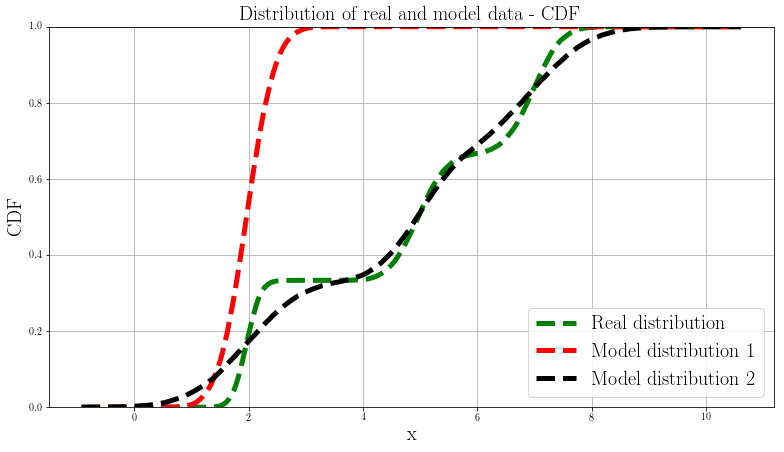

In [35]:
# Plot the cdf
fig = plt.gcf()
fig.set_size_inches(13,7)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(bin_edges[0:-1], cdf_real,linestyle='--', linewidth = 5, color='green', label=r'Real distribution')
plt.plot(bin_edges[0:-1], cdf_dist1,linestyle='--', linewidth = 5, color='red', label=r'Model distribution 1')
plt.plot(bin_edges[0:-1], cdf_dist2,linestyle='--', linewidth = 5, color='black', label=r'Model distribution 2')

#Plot properties
plt.ylim((0,1))

plt.ylabel(r"CDF", fontsize=20)
plt.xlabel(r'x', fontsize=20)

plt.grid(True)
plt.title(r"Distribution of real and model data - CDF", fontsize=20, color='black')

plt.legend(fontsize=20)

#Show
plt.show()

In [36]:
#Save
fig.savefig('KLD_comparison_CDF.eps', format='eps', dpi=1000)

In [37]:
def sample_from_cdf(num_samples, cdf): 
    print('Sample from cdf!')
    random_numbers = np.random.uniform(0, 1, num_samples)
    
    #cdf_ranges = np.linspace(0, 1, num_bins)
    samples = []
    for ix, random_number in enumerate(random_numbers): 
        idx = (np.abs(cdf - random_number)).argmin()
        samples = np.append(samples, bin_edges[idx])
        
    print(random_number)
    
    return samples

In [38]:
pdf_real = sample_from_cdf(10000, cdf_real)
pdf_distr1 = sample_from_cdf(1000, cdf_dist1)
pdf_distr2 = sample_from_cdf(1000, cdf_dist2)

pdf_real, bins_real = np.histogram(pdf_real, bins = bin_edges, density=True)
for count_idx, count in enumerate(pdf_real):
     if count == 0: 
            pdf_real[count_idx] = min_prob
            
pdf_dist1, bins_dist1 = np.histogram(pdf_distr1, bins = bin_edges, density=True)
for count_idx, count in enumerate(pdf_dist1):
     if count == 0: 
            pdf_dist1[count_idx] = min_prob
            
pdf_dist2, bins_dist2 = np.histogram(pdf_distr2, bins = bin_edges, density=True)
for count_idx, count in enumerate(pdf_dist2):
     if count == 0: 
            pdf_dist2[count_idx] = min_prob

Sample from cdf!
0.203609193987
Sample from cdf!
0.593550920882
Sample from cdf!
0.632912149374


In [39]:
#KLD
def KLD(pdf_real, pdf_sim): 
    print('Calculate KLD(pg||pr) = KLD(p_sim||p_real: From generator distribution to real data distribution')
    if not len(pdf_real) == len(pdf_sim): 
        print('Error: pdf arrays have to be of equal size!')
    
    kld_value = 0
    for idx, pdf_value in enumerate(pdf_sim): 
        kld_value += pdf_sim[idx] * np.log(pdf_sim[idx]/pdf_real[idx]) * bin_width
        
    return kld_value

In [40]:
kld_dist1 = KLD(pdf_real, pdf_dist1)
kld_dist2 = KLD(pdf_real, pdf_dist2)

print('KLD value between model distribution 1 and real data distribution: {}'.format(kld_dist1))
print('KLD value between model distribution 2 and real data distribution: {}'.format(kld_dist2))

Calculate KLD(pg||pr) = KLD(p_sim||p_real: From generator distribution to real data distribution
Calculate KLD(pg||pr) = KLD(p_sim||p_real: From generator distribution to real data distribution
KLD value between model distribution 1 and real data distribution: 2.986345691991457
KLD value between model distribution 2 and real data distribution: 3.236891046360606


/home/paul/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


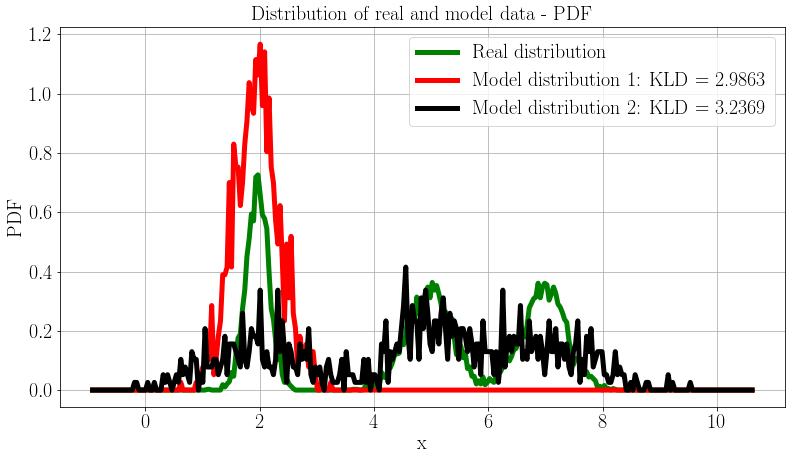

In [51]:
# Plot the pdf
fig = plt.gcf() 
fig.set_size_inches(13,7)
plt.rc('text', usetex=True, fontsize=20)
plt.rc('font', family='serif')

plt.plot(bin_edges[0:-1], pdf_real,linestyle='-', color='green', label=r'Real distribution', linewidth = 5)
plt.plot(bin_edges[0:-1], pdf_dist1,linestyle='-', color='red', label=r'Model distribution 1: KLD = {0:.4f}'.format(kld_dist1), linewidth = 5)
plt.plot(bin_edges[0:-1], pdf_dist2,linestyle='-', color='black', label=r'Model distribution 2: KLD = {0:.4f}'.format(kld_dist2), linewidth = 5)

#plt.ylim((0,1))

plt.ylabel("PDF", fontsize=20)
plt.xlabel('x', fontsize=20)
plt.grid(True)

plt.title(r"Distribution of real and model data - PDF", fontsize=20, color='black')

plt.legend(fontsize=20)

plt.show()

In [52]:
#Save
fig.savefig('KLD_comparison_PDF.eps', format='eps', dpi=1000)